In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [32]:
data = pd.read_csv("Combined Data.csv")

In [33]:
data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [34]:
data.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [36]:
data.status.value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


In [37]:
print(data.columns)

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [38]:
# Group by status and get a random statement from each group
random_statements = data.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}")
    print(f"Statement: {statement}\n")

Status: Anxiety
Statement: I swear my teacher is full of surprises, it makes me anxious

Status: Bipolar
Statement: Severe anxiety after being admitted and realeases...help!! I need help! I cant do this!its a continuous fullblown anxiety!!

Status: Depression
Statement: a an fyi i wa diagnosed at with ocd usual hand washing fear of germ thought of death checking thing over and over again different trigger didn t leave the house for two year it s well controlled now but i m worried now that it s having an impact of relationship so she wa at the time now i m we chatted for two month dated for went on date but mainly she wanted sex had a lot of sex more than actual going out and doing stuff she becomes distant then when we see each other again she say she want to see me more we end up texting a lot a she wa always unavailable either with friend family or her guy friend she would see him more than me we re texting a lot so i tell her how i feel and that i want to see her more few day later

## Preprocessing

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

2.1 Create a new column for cleaned_text and lower the texts


In [40]:
# rename 'statement' to 'original_text'
data.rename(columns={'statement': 'original_text'}, inplace=True)

# create a new column for preprocessing and lower the texts
data['cleaned_text'] = data['original_text'].str.lower()

# preview the dataframe
print(data[['original_text', 'cleaned_text']].head())

                                       original_text  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                        cleaned_text  
0                                         oh my gosh  
1  trouble sleeping, confused mind, restless hear...  
2  all wrong, back off dear, forward doubt. stay ...  
3  i've shifted my focus to something else but i'...  
4  i'm restless and restless, it's been a month n...  


2.2 Remove URLs, special characters, punctuations...

In [41]:
import re

# text preprocessing
def preprocess_text(text):
    if not isinstance(text, str):  # Handle non-string values
        text = ""

    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text.strip()

# apply the function
data['cleaned_text'] = data['cleaned_text'].apply(preprocess_text)

# preview the dataframe
print(data.head())




   Unnamed: 0                                      original_text   status  \
0           0                                         oh my gosh  Anxiety   
1           1  trouble sleeping, confused mind, restless hear...  Anxiety   
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3           3  I've shifted my focus to something else but I'...  Anxiety   
4           4  I'm restless and restless, it's been a month n...  Anxiety   

                                        cleaned_text  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart ...  
2  all wrong back off dear forward doubt stay in ...  
3  ive shifted my focus to something else but im ...  
4  im restless and restless its been a month now ...  


2.3 Tokenization

In [42]:
# Add a "tokens" column, split text into tokens
data['tokens'] = data['cleaned_text'].apply(lambda x: x.split())

# Preview the dataframe
print(data[['original_text', 'cleaned_text', 'tokens']].head())

                                       original_text  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                        cleaned_text  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                              tokens  
0                                     [oh, my, gosh]  
1  [trouble, sleeping, confused, mind, restless, ...  
2  [all, wrong, back, off, dear, forward, doubt, ...  
3  [ive, shifted, my, focus, to, something, else,...  
4  [im, restless, and, restless, its, been, a, mo..

2.4 stop words

In [43]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [token for token in tokens if token not in stop_words]

data['filtered_tokens'] = data['tokens'].apply(remove_stop_words)

print(data[['original_text', 'cleaned_text', 'tokens', 'filtered_tokens']].head())
#


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                       original_text  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                        cleaned_text  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                              tokens  \
0                                     [oh, my, gosh]   
1  [trouble, sleeping, confused, mind, restless, ...   
2  [all, wrong, back, off, dear, forward, doubt, ...   
3  [ive, shifted, my, focus, to, something, else,...   
4  [im, restless, and, restless, its, been, a,

2.5 stemming

In [44]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function for stemming
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the "tokens" column and create a "stemmed_tokens" column
data['stemmed_tokens'] = data['filtered_tokens'].apply(stem_tokens)

# Preview the dataframe
print(data[['original_text', 'cleaned_text', 'tokens', 'filtered_tokens', 'stemmed_tokens']].head())


                                       original_text  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                        cleaned_text  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                              tokens  \
0                                     [oh, my, gosh]   
1  [trouble, sleeping, confused, mind, restless, ...   
2  [all, wrong, back, off, dear, forward, doubt, ...   
3  [ive, shifted, my, focus, to, something, else,...   
4  [im, restless, and, restless, its, been, a,

In [45]:
data.head()

,Unnamed: 0,original_text,status,cleaned_text,tokens,filtered_tokens,stemmed_tokens
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, my, gosh]","[oh, gosh]","[oh, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[troubl, sleep, confus, mind, restless, heart,..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest..."
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,...","[ive, shifted, focus, something, else, im, sti...","[ive, shift, focu, someth, els, im, still, worri]"
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...","[im, restless, restless, month, boy, mean]","[im, restless, restless, month, boy, mean]"


In [46]:
# First check where the NaN values are
print("Columns with NaN values:")
print(data.isnull().sum())

Columns with NaN values:
Unnamed: 0           0
original_text      362
status               0
cleaned_text         0
tokens               0
filtered_tokens      0
stemmed_tokens       0
dtype: int64


## Split the data

In [47]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train (80%) and test (20%)
train_data, test_data = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    stratify=data['status']
)

# Step 2: Further split train into train (65%) and dev (15%)
train_data, dev_data = train_test_split(
    train_data,
    test_size=0.25,  # 0.25 x 0.8 = 0.2 (15% of the original data)
    random_state=42,
    stratify=train_data['status']
)

# Print sizes for verification
print(f"Train size: {len(train_data)}")
print(f"Dev size: {len(dev_data)}")
print(f"Test size: {len(test_data)}")



Train size: 31825
Dev size: 10609
Test size: 10609


In [48]:
print("Train distribution:")
print(train_data['status'].value_counts())

print("Dev distribution:")
print(dev_data['status'].value_counts())

print("Test distribution:")
print(test_data['status'].value_counts())


Train distribution:
status
Normal                  9811
Depression              9242
Suicidal                6391
Anxiety                 2332
Bipolar                 1727
Stress                  1601
Personality disorder     721
Name: count, dtype: int64
Dev distribution:
status
Normal                  3270
Depression              3081
Suicidal                2131
Anxiety                  778
Bipolar                  575
Stress                   534
Personality disorder     240
Name: count, dtype: int64
Test distribution:
status
Normal                  3270
Depression              3081
Suicidal                2131
Anxiety                  778
Bipolar                  575
Stress                   534
Personality disorder     240
Name: count, dtype: int64


## Feature Extraction

**generate** **Bag of Words**

In [49]:
# Function to generate Bag of Words feature dictionaries
def generate_bow_features(tokens):
    features = {}
    for token in tokens:
        features[f"unigram:{token}"] = 1.0
    return features

# Apply the function to each dataset split
train_data['features'] = train_data['stemmed_tokens'].apply(generate_bow_features)
dev_data['features'] = dev_data['stemmed_tokens'].apply(generate_bow_features)
test_data['features'] = test_data['stemmed_tokens'].apply(generate_bow_features)

# Preview feature dictionaries
print(train_data['features'].head())


40845    {'unigram:mizzzidc': 1.0, 'unigram:pair': 1.0,...
11017    {'unigram:stare': 1.0, 'unigram:pack': 1.0, 'u...
18483    {'unigram:sold': 1.0, 'unigram:hous': 1.0, 'un...
42193    {'unigram:also': 1.0, 'unigram:shouldv': 1.0, ...
45792    {'unigram:get': 1.0, 'unigram:hous': 1.0, 'uni...
Name: features, dtype: object


**Add Bigram Features**

In [50]:
from nltk import ngrams

# Function to extract bigrams
def extract_bigrams(tokens):
    bigrams = ['_'.join(bigram) for bigram in ngrams(tokens, 2)]
    return bigrams

# Apply bigram extraction
train_data['bigrams'] = train_data['filtered_tokens'].apply(extract_bigrams)
dev_data['bigrams'] = dev_data['filtered_tokens'].apply(extract_bigrams)
test_data['bigrams'] = test_data['filtered_tokens'].apply(extract_bigrams)

# Check the results
print(train_data[['filtered_tokens', 'bigrams']].head())


                                         filtered_tokens  \
40845  [mizzzidc, pair, nike, spiral, back, depressio...   
11017  [staring, packed, apartment, feeling, ungodly,...   
18483  [sold, house, back, march, rough, run, since, ...   
42193          [also, shouldve, bern, asleep, hour, ago]   
45792  [getting, house, feeling, like, shit, grocery,...   

                                                 bigrams  
40845  [mizzzidc_pair, pair_nike, nike_spiral, spiral...  
11017  [staring_packed, packed_apartment, apartment_f...  
18483  [sold_house, house_back, back_march, march_rou...  
42193  [also_shouldve, shouldve_bern, bern_asleep, as...  
45792  [getting_house, house_feeling, feeling_like, l...  


**Add sentiment features**

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already done
nltk.download('vader_lexicon')

# Initialize the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [52]:
# Function to extract sentiment scores
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores['pos'], scores['neu'], scores['neg'], scores['compound']


In [53]:
# Apply sentiment analysis to train, dev, and test sets
train_data[['sent_pos', 'sent_neu', 'sent_neg', 'sent_compound']] = train_data['cleaned_text'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)
dev_data[['sent_pos', 'sent_neu', 'sent_neg', 'sent_compound']] = dev_data['cleaned_text'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)
test_data[['sent_pos', 'sent_neu', 'sent_neg', 'sent_compound']] = test_data['cleaned_text'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)


In [54]:
# Check the first few rows to confirm sentiment features were added
print(train_data[['cleaned_text', 'sent_pos', 'sent_neu', 'sent_neg', 'sent_compound']].head())


                                            cleaned_text  sent_pos  sent_neu  \
40845  mizzzidc how can a pair of nike spiral you bac...     0.118     0.785   
11017  just staring at my packed up apartment and fee...     0.233     0.661   
18483  i sold my house back in march its been a rough...     0.060     0.841   
42193            also i shouldve bern asleep an hour ago     0.000     1.000   
45792  getting out of the house while feeling like sh...     0.086     0.794   

       sent_neg  sent_compound  
40845     0.097        -0.0475  
11017     0.106         0.8406  
18483     0.099        -0.9012  
42193     0.000         0.0000  
45792     0.121        -0.8681  


In [55]:
# Normalize sentiment features to non-negative range
def normalize_sentiment_features(row):
    normalized_features = {
        "sent_pos": row['sent_pos'],
        "sent_neu": row['sent_neu'],
        "sent_neg": row['sent_neg'],
        "sent_compound": (row['sent_compound'] + 1) / 2  # Normalize from [-1, 1] to [0, 1]
    }
    return normalized_features

# Apply normalization to train, dev, and test sets
train_data['sentiment_features_normalized'] = train_data.apply(normalize_sentiment_features, axis=1)
dev_data['sentiment_features_normalized'] = dev_data.apply(normalize_sentiment_features, axis=1)
test_data['sentiment_features_normalized'] = test_data.apply(normalize_sentiment_features, axis=1)


In [56]:
train_data.head()

,Unnamed: 0,original_text,status,cleaned_text,tokens,filtered_tokens,stemmed_tokens,features,bigrams,sent_pos,sent_neu,sent_neg,sent_compound,sentiment_features_normalized
40845,40845,mizzzidc how can a pair of nike spiral you bac...,Depression,mizzzidc how can a pair of nike spiral you bac...,"[mizzzidc, how, can, a, pair, of, nike, spiral...","[mizzzidc, pair, nike, spiral, back, depressio...","[mizzzidc, pair, nike, spiral, back, depress, ...","{'unigram:mizzzidc': 1.0, 'unigram:pair': 1.0,...","[mizzzidc_pair, pair_nike, nike_spiral, spiral...",0.118,0.785,0.097,-0.0475,"{'sent_pos': 0.118, 'sent_neu': 0.785, 'sent_n..."
11017,11017,Just staring at my packed up apartment and fee...,Suicidal,just staring at my packed up apartment and fee...,"[just, staring, at, my, packed, up, apartment,...","[staring, packed, apartment, feeling, ungodly,...","[stare, pack, apart, feel, ungodli, alon, know...","{'unigram:stare': 1.0, 'unigram:pack': 1.0, 'u...","[staring_packed, packed_apartment, apartment_f...",0.233,0.661,0.106,0.8406,"{'sent_pos': 0.233, 'sent_neu': 0.661, 'sent_n..."
18483,18483,I sold my house back in March. Its been a roug...,Suicidal,i sold my house back in march its been a rough...,"[i, sold, my, house, back, in, march, its, bee...","[sold, house, back, march, rough, run, since, ...","[sold, hous, back, march, rough, run, sinc, pl...","{'unigram:sold': 1.0, 'unigram:hous': 1.0, 'un...","[sold_house, house_back, back_march, march_rou...",0.060,0.841,0.099,-0.9012,"{'sent_pos': 0.06, 'sent_neu': 0.841, 'sent_ne..."
42193,42193,also i shouldve bern asleep an hour ago,Normal,also i shouldve bern asleep an hour ago,"[also, i, shouldve, bern, asleep, an, hour, ago]","[also, shouldve, bern, asleep, hour, ago]","[also, shouldv, bern, asleep, hour, ago]","{'unigram:also': 1.0, 'unigram:shouldv': 1.0, ...","[also_shouldve, shouldve_bern, bern_asleep, as...",0.000,1.000,0.000,0.0000,"{'sent_pos': 0.0, 'sent_neu': 1.0, 'sent_neg':..."
45792,45792,Getting out of the house while feeling like sh...,Bipolar,getting out of the house while feeling like sh...,"[getting, out, of, the, house, while, feeling,...","[getting, house, feeling, like, shit, grocery,...","[get, hous, feel, like, shit, groceri, shop, d...","{'unigram:get': 1.0, 'unigram:hous': 1.0, 'uni...","[getting_house, house_feeling, feeling_like, l...",0.086,0.794,0.121,-0.8681,"{'sent_pos': 0.086, 'sent_neu': 0.794, 'sent_n..."


**Combine all features**


In [57]:
# Combine all features into a single dictionary
def combine_all_features(row):
    features = {}

    # Add unigrams
    for token in row['filtered_tokens']:
        features[f'unigram:{token}'] = 1.0

    # Add bigrams
    for bigram in row['bigrams']:
        features[f'bigram:{bigram}'] = 1.0

    # Add normalized sentiment features
    features.update(row['sentiment_features_normalized'])

    return features

# Apply the function to train, dev, and test sets
train_data['all_features'] = train_data.apply(combine_all_features, axis=1)
dev_data['all_features'] = dev_data.apply(combine_all_features, axis=1)
test_data['all_features'] = test_data.apply(combine_all_features, axis=1)


In [58]:
print(train_data['all_features'].head())

40845    {'unigram:mizzzidc': 1.0, 'unigram:pair': 1.0,...
11017    {'unigram:staring': 1.0, 'unigram:packed': 1.0...
18483    {'unigram:sold': 1.0, 'unigram:house': 1.0, 'u...
42193    {'unigram:also': 1.0, 'unigram:shouldve': 1.0,...
45792    {'unigram:getting': 1.0, 'unigram:house': 1.0,...
Name: all_features, dtype: object


**DictVectorizer**

In [59]:
from sklearn.feature_extraction import DictVectorizer

# Vectorize the combined features
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(train_data['all_features'])
X_dev = vectorizer.transform(dev_data['all_features'])
X_test = vectorizer.transform(test_data['all_features'])

# Labels
y_train = train_data['status']
y_dev = dev_data['status']
y_test = test_data['status']



In [60]:
# Print feature names
print(vectorizer.feature_names_[:10])  # First 10 features
print("Train Feature Matrix Shape:", X_train.shape)


['bigram:aa_call', 'bigram:aa_chchance', 'bigram:aa_dont', 'bigram:aa_ggenerator', 'bigram:aa_groups', 'bigram:aa_ha', 'bigram:aa_heard', 'bigram:aa_llot', 'bigram:aa_meeting', 'bigram:aa_meetings']
Train Feature Matrix Shape: (31825, 841555)


## Train Model


Train logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with balanced class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the dev set
y_dev_pred = model.predict(X_dev)

# Evaluate on the dev set
print("Accuracy on Dev Set:", accuracy_score(y_dev, y_dev_pred))
print("\nClassification Report on Dev Set:")
print(classification_report(y_dev, y_dev_pred))


Accuracy on Dev Set: 0.7681214063530964

Classification Report on Dev Set:
                      precision    recall  f1-score   support

             Anxiety       0.78      0.79      0.79       778
             Bipolar       0.85      0.73      0.79       575
          Depression       0.75      0.69      0.72      3081
              Normal       0.87      0.95      0.91      3270
Personality disorder       0.67      0.72      0.69       240
              Stress       0.60      0.55      0.57       534
            Suicidal       0.66      0.66      0.66      2131

            accuracy                           0.77     10609
           macro avg       0.74      0.73      0.73     10609
        weighted avg       0.76      0.77      0.77     10609



In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier

configurations (dev set)


In [ ]:
# Placeholder for results
results = []

configurations = [
    {"features": "unigrams", "model": "LogisticRegression", "C": 0.5},
    {"features": "unigrams", "model": "LogisticRegression", "C": 1.0},
    {"features": "unigrams", "model": "LogisticRegression", "C": 2.0},
    {"features": "unigrams_bigrams_sentiment", "model": "LogisticRegression", "C": 0.5},
    {"features": "unigrams_bigrams_sentiment", "model": "LogisticRegression", "C": 1.0},
    {"features": "unigrams_bigrams_sentiment", "model": "LogisticRegression", "C": 2.0},
    {"features": "unigrams", "model": "NaiveBayes", "alpha": 0.1},
    {"features": "unigrams", "model": "NaiveBayes", "alpha": 0.2},
    {"features": "unigrams", "model": "NaiveBayes", "alpha": 0.5},
    {"features": "unigrams_bigrams_sentiment", "model": "NaiveBayes", "alpha": 0.1},
    {"features": "unigrams_bigrams_sentiment", "model": "NaiveBayes", "alpha": 0.2},
    {"features": "unigrams_bigrams_sentiment", "model": "NaiveBayes", "alpha": 0.5},
    {"features": "unigrams", "model": "RandomForest", "n_estimators": 100},
    {"features": "unigrams", "model": "RandomForest", "n_estimators": 200},
    {"features": "unigrams_bigrams_sentiment", "model": "RandomForest", "n_estimators": 100},
    {"features": "unigrams_bigrams_sentiment", "model": "RandomForest", "n_estimators": 200},
]

# Adjusted feature preparation
def prepare_features(config, train, dev):
    vectorizer = DictVectorizer()
    if config['features'] == 'unigrams':
        X_train = vectorizer.fit_transform(train['features'])
        X_dev = vectorizer.transform(dev['features'])
    elif config['features'] == 'unigrams_bigrams_sentiment':
        X_train = vectorizer.fit_transform(train['all_features'])
        X_dev = vectorizer.transform(dev['all_features'])
    else:
        raise ValueError("Invalid feature type")
    return X_train, X_dev, vectorizer

# Run grid search
for config in configurations:
    print(f"Running configuration: {config}")

    # Prepare features
    X_train, X_dev, vectorizer = prepare_features(config, train_data, dev_data)
    y_train = train_data['status']
    y_dev = dev_data['status']

    # Train model
    if config["model"] == "LogisticRegression":
        model = LogisticRegression(C=config["C"], class_weight='balanced', max_iter=1000)
    elif config["model"] == "NaiveBayes":
        model = MultinomialNB(alpha=config["alpha"])
    elif config["model"] == "RandomForest":
        model = RandomForestClassifier(n_estimators=config["n_estimators"], random_state=42)
    else:
        raise ValueError("Invalid model")

    model.fit(X_train, y_train)
    y_dev_pred = model.predict(X_dev)

    # Evaluate model
    accuracy = accuracy_score(y_dev, y_dev_pred)
    report = classification_report(y_dev, y_dev_pred, zero_division=0)

    # Save results
    results.append({"config": config, "accuracy": accuracy, "report": report})
    print(f"Accuracy: {accuracy}\n")

# Display the best configuration
best_result = max(results, key=lambda x: x['accuracy'])
print("Best Configuration:")
print(f"Config: {best_result['config']}")
print(f"Accuracy: {best_result['accuracy']}")
print(f"Classification Report:\n{best_result['report']}")


Running configuration: {'features': 'unigrams', 'model': 'LogisticRegression', 'C': 0.5}
Accuracy: 0.7527570930342162

Running configuration: {'features': 'unigrams', 'model': 'LogisticRegression', 'C': 1.0}
Accuracy: 0.7471015175794137

Running configuration: {'features': 'unigrams', 'model': 'LogisticRegression', 'C': 2.0}
Accuracy: 0.7380525968517296

Running configuration: {'features': 'unigrams_bigrams_sentiment', 'model': 'LogisticRegression', 'C': 0.5}
Accuracy: 0.7708549344895843

Running configuration: {'features': 'unigrams_bigrams_sentiment', 'model': 'LogisticRegression', 'C': 1.0}
Accuracy: 0.7681214063530964

Running configuration: {'features': 'unigrams_bigrams_sentiment', 'model': 'LogisticRegression', 'C': 2.0}
Accuracy: 0.7671788104439626

Running configuration: {'features': 'unigrams', 'model': 'NaiveBayes', 'alpha': 0.1}
Accuracy: 0.6796116504854369

Running configuration: {'features': 'unigrams', 'model': 'NaiveBayes', 'alpha': 0.2}
Accuracy: 0.6769723819398624

Ru

configurations (test set)

In [ ]:
# Best configurations from dev set to evaluate on test set
test_configurations = [
    {"features": "unigrams_bigrams_sentiment", "model": "LogisticRegression", "C": 0.5},
    {"features": "unigrams_bigrams_sentiment", "model": "LogisticRegression", "C": 1.0},
    {"features": "unigrams_bigrams_sentiment", "model": "NaiveBayes", "alpha": 0.1}
]

test_results = []

# Run evaluations on test set
for config in test_configurations:
    print(f"Running configuration on test set: {config}")

    # Prepare features using the same vectorizer from training
    if config['features'] == 'unigrams':
        X_train = vectorizer.fit_transform(train_data['features'])
        X_test = vectorizer.transform(test_data['features'])
    elif config['features'] == 'unigrams_bigrams_sentiment':
        X_train = vectorizer.fit_transform(train_data['all_features'])
        X_test = vectorizer.transform(test_data['all_features'])

    y_train = train_data['status']
    y_test = test_data['status']

    # Train model
    if config["model"] == "LogisticRegression":
        model = LogisticRegression(C=config["C"], class_weight='balanced', max_iter=1000)
    elif config["model"] == "NaiveBayes":
        model = MultinomialNB(alpha=config["alpha"])

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred, zero_division=0)

    # Save results
    test_results.append({
        "config": config,
        "accuracy": accuracy,
        "report": report
    })
    print(f"Test Accuracy: {accuracy}\n")

# Print all results
for result in test_results:
    print(f"Configuration: {result['config']}")
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    print("-" * 50)

Running configuration on test set: {'features': 'unigrams_bigrams_sentiment', 'model': 'LogisticRegression', 'C': 0.5}
Test Accuracy: 0.7724573475351117

Running configuration on test set: {'features': 'unigrams_bigrams_sentiment', 'model': 'LogisticRegression', 'C': 1.0}
Test Accuracy: 0.7723630879441983

Running configuration on test set: {'features': 'unigrams_bigrams_sentiment', 'model': 'NaiveBayes', 'alpha': 0.1}
Test Accuracy: 0.7055330379866152

Configuration: {'features': 'unigrams_bigrams_sentiment', 'model': 'LogisticRegression', 'C': 0.5}
Test Accuracy: 0.7725
--------------------------------------------------
Configuration: {'features': 'unigrams_bigrams_sentiment', 'model': 'LogisticRegression', 'C': 1.0}
Test Accuracy: 0.7724
--------------------------------------------------
Configuration: {'features': 'unigrams_bigrams_sentiment', 'model': 'NaiveBayes', 'alpha': 0.1}
Test Accuracy: 0.7055
--------------------------------------------------


Train model using best configuration

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with balanced class weights
model = LogisticRegression(C=0.5, max_iter=1000, class_weight='balanced', random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the dev set
y_dev_pred = model.predict(X_dev)

# Evaluate on the dev set
print("Accuracy on Dev Set:", accuracy_score(y_dev, y_dev_pred))
print("\nClassification Report on Dev Set:")
print(classification_report(y_dev, y_dev_pred))

# Test set evaluation
X_test = vectorizer.transform(test_data['all_features'])
y_test = test_data['status']
y_test_pred = model.predict(X_test)

print("Accuracy on Test Set:")
print(accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred, zero_division=0))

Accuracy on Dev Set: 0.7708549344895843

Classification Report on Dev Set:
                      precision    recall  f1-score   support

             Anxiety       0.78      0.80      0.79       778
             Bipolar       0.85      0.74      0.79       575
          Depression       0.76      0.69      0.72      3081
              Normal       0.86      0.95      0.91      3270
Personality disorder       0.66      0.72      0.69       240
              Stress       0.60      0.55      0.57       534
            Suicidal       0.67      0.66      0.66      2131

            accuracy                           0.77     10609
           macro avg       0.74      0.73      0.73     10609
        weighted avg       0.77      0.77      0.77     10609

Accuracy on Test Set:
0.7724573475351117
Classification Report on Test Set:
                      precision    recall  f1-score   support

             Anxiety       0.79      0.77      0.78       778
             Bipolar       0.80      0.

## Confusion matrix

<Figure size 1000x800 with 0 Axes>

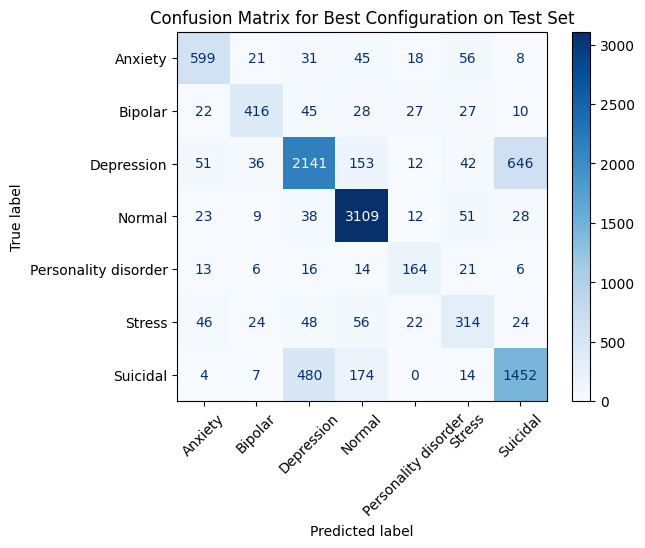

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = sorted(y_test.unique())
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=labels)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Best Configuration on Test Set")
plt.xticks(rotation=45)
plt.show()